In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv('/Users/jotech/Milestone Repo/milestone-project-5/data/clean_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
df['Scaled_Close'] = df_scaled

In [4]:
X = df_scaled[:-1]
y = df_scaled[1:]

In [5]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, shuffle=False)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

In [7]:
model.compile(optimizer=tf.keras.optimizers.legacy.SGD(lr=0.001), loss='mse', metrics=['mse'])

/Users/jotech/Milestone Repo/milestone-project-5/.venv/lib/python3.9/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
76/76 - 0s - loss: 0.2027 - mse: 0.2027 - 201ms/epoch - 3ms/step
Epoch 2/100
76/76 - 0s - loss: 0.1161 - mse: 0.1161 - 36ms/epoch - 470us/step
Epoch 3/100
76/76 - 0s - loss: 0.0738 - mse: 0.0738 - 32ms/epoch - 416us/step
Epoch 4/100
76/76 - 0s - loss: 0.0524 - mse: 0.0524 - 30ms/epoch - 398us/step
Epoch 5/100
76/76 - 0s - loss: 0.0417 - mse: 0.0417 - 29ms/epoch - 378us/step
Epoch 6/100
76/76 - 0s - loss: 0.0360 - mse: 0.0360 - 29ms/epoch - 381us/step
Epoch 7/100
76/76 - 0s - loss: 0.0341 - mse: 0.0341 - 29ms/epoch - 382us/step
Epoch 8/100
76/76 - 0s - loss: 0.0330 - mse: 0.0330 - 29ms/epoch - 379us/step
Epoch 9/100
76/76 - 0s - loss: 0.0319 - mse: 0.0319 - 30ms/epoch - 389us/step
Epoch 10/100
76/76 - 0s - loss: 0.0303 - mse: 0.0303 - 29ms/epoch - 386us/step
Epoch 11/100
76/76 - 0s - loss: 0.0294 - mse: 0.0294 - 30ms/epoch - 392us/step
Epoch 12/100
76/76 - 0s - loss: 0.0288 - mse: 0.0288 - 29ms/epoch - 376us/step
Epoch 13/100
76/76 - 0s - loss: 0.0287 - mse: 0.0287 - 29ms/ep

In [9]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}\nMAE: {mae:.4f}\nR2: {r2:.4f}')

19/19 [==============================] - 0s 406us/step
MSE: 0.0102
MAE: 0.0979
R2: -3.8248


In [10]:
predicted_price = model.predict([df_scaled[-1]])
predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))
print('Predicted price for ^GSPC', predicted_price[0][0])

1/1 [==============================] - 0s 25ms/step
Predicted price for ^GSPC 1743.5511


19/19 [==============================] - 0s 411us/step


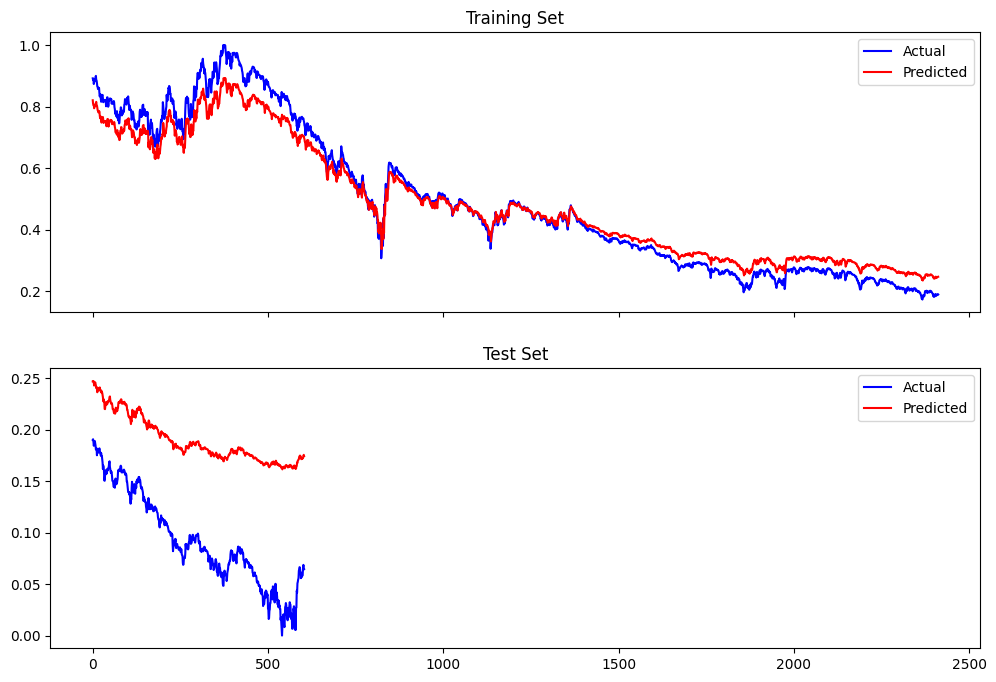

In [11]:
import matplotlib.pyplot as plt

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))

ax1.set_title('Training Set')
ax1.plot(y_train, color='blue', label='Actual')
ax1.plot(y_pred_train, color='red', label='Predicted')
ax1.legend()

ax2.set_title('Test Set')
ax2.plot(y_test, color='blue', label='Actual'), 
ax2.plot(y_pred_test, color='red', label='Predicted'),
ax2.legend()